In [293]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
%matplotlib inline

In [294]:
ruta = '/home/jose/Documentos/unam/data/fifa-18-more-complete-player-dataset/'

In [295]:
df = pd.read_csv(ruta+'complete.csv',encoding='utf-8').reset_index(drop=True)

In [296]:
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality
0,16,Luis García,Luis García Fernández,KAS Eupen,https://cdn.sofifa.org/18/teams/2013.png,1874,36,Belgian First Division A,1981-02-06,178,65,Lean,False,https://cdn.sofifa.org/flags/45@3x.png,Spain,https://cdn.sofifa.org/18/players/16.png,575000,7000,834000.0,70,70,54,68,72,69,49,64,1,3,3,Medium,Medium,Right,68,64,61,72,68,69,76,74,71,72,56,52,62,65,72,72,64,65,60,71,71,68,72,73,75,79,37,46,42,9,12,13,11,11,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,28,Manu Herrera,Manuel Herrera Yagüe,CA Osasuna,https://cdn.sofifa.org/18/teams/479.png,1143,35,Spanish Segunda División,1981-09-29,182,75,Normal,False,https://cdn.sofifa.org/flags/45@3x.png,Spain,https://cdn.sofifa.org/18/players/28.png,425000,4000,680000.0,70,70,69,71,68,67,45,71,1,1,3,Medium,Medium,Left,25,13,14,22,13,13,24,14,23,15,41,49,55,64,60,25,65,32,60,12,37,26,15,24,18,45,11,13,14,69,71,68,71,67,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,41,Iniesta,Andrés Iniesta Luján,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2073,33,Spanish Primera División,1984-05-11,171,68,Normal,True,https://cdn.sofifa.org/flags/45@3x.png,Spain,https://cdn.sofifa.org/18/players/41.png,29500000,260000,60500000.0,87,87,71,70,87,90,58,58,4,4,4,High,Medium,Right,77,70,54,92,74,90,80,70,86,94,72,71,79,88,84,65,52,58,58,71,5

In [297]:
df = df.loc[df[[x for x in df.columns if x[:2]=='gk']].mean(axis=1)<=10]

In [298]:
df = df.loc[df.overall>=85]

In [299]:
df.reset_index(drop=True,inplace=True)

In [300]:
df.shape

(80, 131)

In [301]:
var = ['age','height_cm','weight_kg','eur_value','eur_wage','overall',
      'potential','pac','sho','pas','dri','def','phy','international_reputation','skill_moves','weak_foot','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','composure','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']

In [302]:
X = df[var].copy()

In [303]:
X.head()

,age,height_cm,weight_kg,eur_value,eur_wage,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,33,171,68,29500000,260000,87,87,71,70,87,90,58,58,4,4,4,77,70,54,92,74,90,80,70,86,94,72,71,79,88,84,65,52,58,58,71,58,66,84,94,71,89,57,57,56,6,13,6,13,7
1,33,180,80,36000000,225000,88,88,86,86,81,91,32,63,4,4,2,80,85,51,84,86,92,87,81,71,89,87,86,89,87,91,87,61,68,67,88,47,39,85,83,80,86,29,26,26,10,8,11,5,15
2,32,185,80,95500000,565000,94,94,90,93,82,90,33,80,5,5,4,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11
3,35,195,95,27000000,240000,88,88,65,88,81,82,32,82,5,4,4,76,87,80,84,90,82,82,82,76,88,63,67,81,86,41,91,69,71,88,85,84,20,86,83,91,91,15,41,27,13,15,10,9,12
4,34,188,81,13500000,94000,86,86,68,51,57,61,86,80,4,2,3,46,46,80,70,23,58,44,47,61,62,65,70,63,83,49,63,76,62,84,56,94,86,40,48,57,77,86,86,87,8,15,5,9,10


In [304]:
X.describe()

,age,height_cm,weight_kg,eur_value,eur_wage,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,80.00000,80.000000,80.000000,8.000000e+01,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,28.27500,181.225000,76.862500,4.958125e+07,206137.500000,86.95000,88.037500,76.175000,72.137500,76.650000,79.762500,59.962500,73.83750,3.575000,3.287500,3.437500,71.887500,69.375000,70.487500,81.300000,69.462500,78.875000,72.975000,68.312500,75.400000,82.700000,75.875000,76.350000,76.262500,84.975000,71.450000,78.20000,72.612500,77.775000,73.400000,72.812500,70.400000,62.312500,73.862500,77.000000,69.912500,84.075000,54.000000,61.362500,57.600000,9.262500,9.475000,9.412500,8.800000,9.37500
std,2.92079,7.294831,7.650174,2.032200e+07,89126.811058,1.94806,2.319121,10.379843,13.831485,8.955728,9.607808,23.951134,8.82953,0.590537,0.902791,0.743644,12.875247,17.907904,14.095509,6.939887,16.353642,11.124582,13.665048,15.370195,9.819382,8.415477,10.893472,10.662961,12.657858,3.371417,14.671854,9.05175,12.611522,9.292674,11.767365,14.277621,14.834616,24.590105,17.395434,12.248482,11.985428,4.265775,28.342838,25.936751,27.209734,3.658677,3.680173,4.036836,3.924606,3.50903
min,23.00000,163.000000,59.000000,5.000000e+06,60000.000000,85.00000,85.000000,40.000000,32.000000,44.000000,53.000000,22.000000,50.00000,3.000000,2.000000,2.000000,29.000000,21.000000,35.000000,59.000000,17.000000,51.000000,32.000000,26.000000,50.000000,57.000000,48.000000,34.000000,34.000000,79.000000,41.000000,52.00000,32.000000,46.000000,42.000000,20.000000,34.000000,18.000000,24.000000,23.000000,33.000000,75.000000,12.000000,14.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,26.00000,175.750000,72.000000,3.750000e+07,157500.000000,85.75000,86.000000,71.000000,62.750000,72.000000,73.750000,37.750000,67.75000,3.000000,3.000000,3.000000,65.750000,58.750000,56.750000,78.750000,57.750000,69.000000,65.000000,60.500000,70.000000,79.000000,68.750000,70.000000,65.000000,83.000000,59.750000,73.75000,64.750000,72.750000,63.750000,66.000000,58.000000,39.000000,65.000000,73.750000,62.500000,82.000000,25.000000,39.000000,30.000000,6.000000,7.000000,5.000000,5.000000,6.00000
50%,28.00000,181.500000,76.000000,4.550000e+07,190000.000000,86.00000,88.000000,76.000000,75.500000,78.000000,82.000000,63.000000,75.50000,4.000000,3.000000,3.000000,76.000000,73.500000,73.000000,82.500000,74.500000,82.000000,78.000000,73.000000,77.000000,85.000000,76.000000,77.000000,77.500000,85.000000,72.500000,80.00000,75.000000,77.500000,75.500000,76.500000,70.500000,69.500000,81.000000,79.000000,71.500000,84.000000,58.500000,67.500000,62.000000,10.000000,10.000000,9.500000,8.500000,10.00000
75%,30.00000,187.000000,81.000000,5.900000e+07,250000.000000,88.00000,90.000000,86.000000,83.000000,83.250000,87.000000,84.000000,81.00000,4.000000,4.000000,4.000000,80.250000,85.000000,83.000000,86.000000,82.000000,87.000000,83.000000,79.000000,82.250000,88.000000,85.250000,84.250000,87.000000,87.000000,84.000000,85.00000,82.000000,85.000000,82.250000,83.000000,83.250000,85.250000,86.000000,86.000000,78.250000,86.000000,83.250000,86.000000,85.000000,12.000000,12.000000,13.000000,12.000000,12.250

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b3ac87d0>,
      dtype=object)

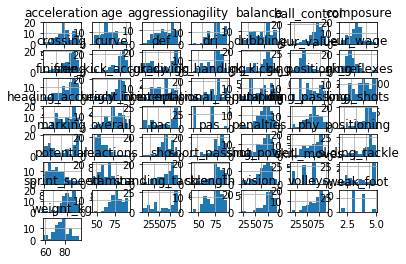

In [305]:
X.hist()

In [306]:
X.corr()

,age,height_cm,weight_kg,eur_value,eur_wage,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
age,1.000000,0.152713,0.169965,-0.492795,0.071721,0.129255,-0.466858,-0.197844,-0.294226,-0.239685,-0.263777,0.226150,0.067527,0.340154,-0.174378,-0.248412,-0.231759,-0.297729,0.146744,-0.181475,-0.205957,-0.284096,-0.265278,-0.239352,-0.130112,-0.257698,-0.253522,-0.141725,-0.194054,0.070122,-0.178678,-0.162499,0.102585,-0.361461,0.144813,-0.301681,0.184109,0.191775,-0.333837,-0.224680,-0.076323,0.117190,0.234407,0.210541,0.232351,-0.121741,-0.121825,-0.211574,-0.115507,-0.071942
height_cm,0.152713,1.000000,0.842981,-0.253809,-0.096285,-0.082929,-0.124711,-0.445709,-0.330885,-0.506809,-0.686436,0.325562,0.607644,0.078308,-0.532751,-0.083711,-0.491243,-0.350067,0.687940,-0.471671,-0.330875,-0.633403,-0.461781,-0.402883,-0.247436,-0.566955,-0.615620,-0.277999,-0.759152,-0.191233,-0.909149,0.030174,0.330628,-0.191203,0.773553,-0.361278,0.362472,0.236282,-0.445446,-0.468925,-0.179008,-0.120549,0.326747,0.274198,0.279145,-0.145473,0.026145,-0.093460,-0.157137,-0.065646
weight_kg,0.169965,0.842981,1.000000,-0.231529,-0.035227,-0.042936,-0.104586,-0.331581,-0.250081,-0.462419,-0.585645,0.256272,0.575538,0.062553,-0.490892,-0.049368,-0.411914,-0.286326,0.622195,-0.492988,-0.262448,-0.518849,-0.397313,-0.399773,-0.225226,-0.520310,-0.497200,-0.174751,-0.674529,-0.140990,-0.752898,0.154500,0.255806,-0.229067,0.783406,-0.271421,0.295957,0.160647,-0.369395,-0.397972,-0.128523,-0.022177,0.265742,0.206950,0.226190,-0.100902,0.021682,-0.071099,-0.181374,-0.098492
eur_value,-0.492795,-0.253809,-0.231529,1.000000,0.639102,0.751665,0.843831,0.368296,0.588708,0.401156,0.562897,-0.528574,-0.242178,0.354681,0.468223,0.400089,0.348166,0.589271,-0.091017,0.320337,0.560374,0.553914,0.471851,0.471937,0.164986,0.563409,0.445589,0.286162,0.453674,0.523530,0.328599,0.409695,-0.089691,0.244052,-0.245403,0.523375,-0.410274,-0.483449,0.544911,0.405026,0.416907,0.436598,-0.544550,-0.519067,-0.545569,0.090963,0.108561,0.258501,0.196137,0.118498
eur_wage,0.071721,-0.096285,-0.035227,0.639102,1.000000,0.793693,0.543793,0.158625,0.455494,0.350313,0.403727,-0.340147,-0.109463,0.644946,0.367626,0.202671,0.271273,0.452034,0.040743,0.319289,0.434551,0.378322,0.379836,0.352393,0.159790,0.468146,0.219298,0.105119,0.275246,0.527810,0.142753,0.343552,-0.054007,0.061646,-0.050769,0.405973,-0.258336,-0.323320,0.370476,0.377242,0.412432,0.530047,-0.363686,-0.327169,-0.348993,0.088084,0.147528,0.193519,0.051178,0.049535
overall,0.129255,-0.082929,-0.042936,0.751665,0.793693,1.000000,0.689679,0.200761,0.343673,0.207944,0.319253,-0.288429,-0.088053,0.652496,0.274586,0.225000,0.158747,0.334365,0.130437,0.162168,0.379792,0.287085,0.247218,0.252492,0.118187,0.351938,0.227562,0.170872,0.270559,0.626192,0.142962,0.315714,0.080608,0.018250,-0.036113,0.285012,-0.221814,-0.278450,0.252307,0.210079,0.308292,0.548829,-0.301247,-0.297514,-0.311069,0.003641,0.038668,0.153962,0.111261,0.076848
potential,-0.466858,-0.124711,-0.104586,0.843831,0.543793,0.689679,1.000000,0.277897,0.376701,0.247473,0.385009,-0.366420,-0.098607,0.279825,0.345449,0.298638,0.157421,0.370895,-0.003277,0.199062,0.357662,0.368657,0.294009,0.322467,0.178876,0.416330,0.309838,0.242607,0.323068,0.414576,0.172114,0.254707,0.032097,0.125505,-0.069205,0.367596,-0.267564,-0.351804,0.313901,0.248212,0.292944,0.413001,-0.380726,-0.349564,-0.395738,0.083861,0.079459,0.133537,0.116268,0.076024
pac,-0.197844,-0.445709,-0.331581,0.368296,0.158625,0.200761,0.277897,1.000000,0.477615,0.180548,0.518162,-0.519522,-0.286553,0.0

In [307]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

In [308]:
sc = StandardScaler()
mm = MinMaxScaler()

In [309]:
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [310]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [311]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [312]:
mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

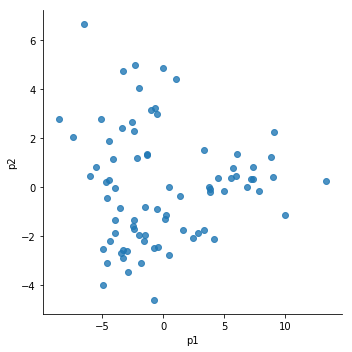

In [313]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

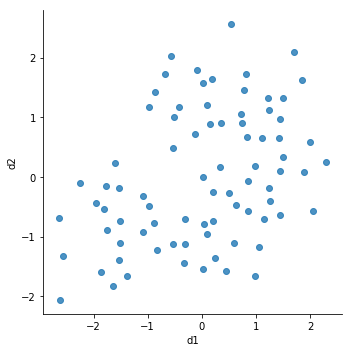

In [314]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [315]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [316]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xmm)
    lst_inertia.append(cl.inertia_)

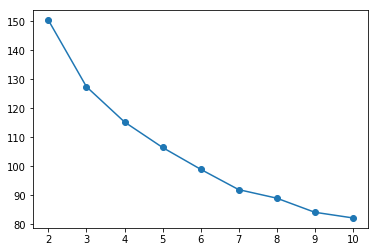

In [317]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [318]:
cl = GMM(n_components=4)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [319]:
Xp['cl']=Xmm['cl'] = Xm['cl']=Xp['cl'] = df['cl'] = cl.fit_predict(Xmm)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWar

In [320]:
from sklearn.feature_selection import SelectKBest

In [321]:
sk = SelectKBest(k=10)

In [322]:
sk.fit(Xmm[var],Xmm['cl'])

SelectKBest(k=10, score_func=<function f_classif at 0x7ff6c8b731b8>)

In [323]:
var_best= [x for x,y in zip(var,sk.get_support()) if y]

In [324]:
var_best

['sho',
 'dri',
 'def',
 'finishing',
 'dribbling',
 'interceptions',
 'positioning',
 'marking',
 'standing_tackle',
 'sliding_tackle']

In [325]:
Xmm[['cl']+var_best].groupby('cl').mean()

,sho,dri,def,finishing,dribbling,interceptions,positioning,marking,standing_tackle,sliding_tackle
cl,,,,,,,,,,
0,0.670641,0.702960,0.752674,0.648034,0.687747,0.809582,0.758643,0.715341,0.803613,0.774432
1,0.356185,0.313953,0.947861,0.333538,0.264822,0.922604,0.358515,0.925000,0.948718,0.945455
2,0.810730,0.825581,0.194519,0.820639,0.821146,0.287469,0.853393,0.163068,0.291375,0.252841
3,0.872365,0.661130,0.212185,0.903475,0.675466,0.248069,0.916499,0.166071,0.258242,0.228571


In [326]:
aux = df[['name','full_name','club','league','nationality','cl']].copy()

In [327]:
aux['n'] = 1

In [328]:
piv = aux.pivot_table(index='league',
                columns='cl',
                values='n',
                fill_value=0,
                aggfunc='count')

In [329]:
for i in range(4):
    piv[i]/=piv[i].sum()

In [330]:
piv.sort_values(3,ascending=0)

cl,0,1,2,3
league,,,,
English Premier League,0.181818,0.227273,0.409091,0.428571
German Bundesliga,0.136364,0.181818,0.181818,0.214286
Spanish Primera División,0.363636,0.272727,0.181818,0.214286
French Ligue 1,0.045455,0.090909,0.090909,0.071429
Italian Serie A,0.272727,0.181818,0.136364,0.071429
Turkish Süper Lig,0.000000,0.045455,0.000000,0.000000


In [352]:
df.loc[df.cl==1].sample(frac=1)[['full_name','name','nationality','club']]

,full_name,name,nationality,club
10,Sergio Ramos García,Sergio Ramos,Spain,Real Madrid CF
55,Sergio Busquets Burgos,Sergio Busquets,Spain,FC Barcelona
8,Gerard Piqué Bernabeu,Piqué,Spain,FC Barcelona
6,Giorgio Chiellini,G. Chiellini,Italy,Juventus
23,Jan Vertonghen,J. Vertonghen,Belgium,Tottenham Hotspur
36,David Luiz Moreira Marinho,David Luiz,Brazil,Chelsea
75,Raphaël Varane,R. Varane,France,Real Madrid CF
58,Kamil Glik,K. Glik,Poland,AS Monaco
39,Diego Godín,D. Godín,Uruguay,Atlético Madrid
43,Jérôme Boateng,J. Boateng,Germany,FC Bayern Munich


In [ ]:
sns.lmplot(data=Xp,x='p1',y='p2',hue='cl',fit_reg=False)

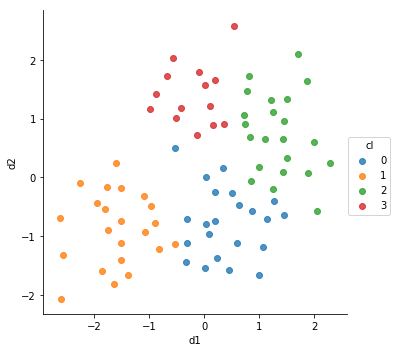

In [341]:
sns.lmplot(data=Xm.merge(df[['name']],left_index=True,right_index=True,how='inner'),x='d1',y='d2',hue='cl',fit_reg=False)

In [334]:
pca.explained_variance_ratio_.cumsum()

array([0.43157288, 0.53658774])

In [345]:
new_data = df_full.loc[df_full.ID.isin([146530,167397,178088,
                            192227,202166,204963])].copy()

In [347]:
new_data['cl'] = cl.predict(mm.transform(new_data[var]))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [349]:
new_data[['name','full_name','club','cl']]

,name,full_name,club,cl
648,Dani Alves,Daniel Alves da Silva,Paris Saint-Germain,0
1692,Falcao,Radamel Falcao García Zarate,AS Monaco,3
2488,Juan Mata,Juan Manuel Mata García,Manchester United,2
4410,S. Mustafi,Shkodran Mustafi,Arsenal,1
6080,J. Draxler,Julian Draxler,Paris Saint-Germain,2
6780,Carvajal,Daniel Carvajal Ramos,Real Madrid CF,1


In [353]:
new_data  = pd.read_csv(ruta+'complete.csv',encoding='utf-8').reset_index(drop=True) 
#FC Bayern Munich

In [354]:
new_data['cl'] = cl.predict(mm.transform(new_data[var]))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [367]:
new_data.loc[new_data.club=='Real Madrid CF'][['name','cl']]

,name,cl
75,Cristiano Ronaldo,3
860,Sergio Ramos,1
1596,K. Benzema,3
2159,G. Bale,3
2304,Marcelo,0
2340,L. Modrić,0
2427,Kiko Casilla,0
2842,T. Kroos,0
4574,K. Navas,0
5067,Isco,2
